In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_curve, classification_report, confusion_matrix, auc

In [217]:
df = pd.read_csv('shots_df_all_leagues_for_model.csv').drop('Unnamed: 0', axis=1)

1. Separe the data in X and y
2. Train and test split

In [218]:
X = df.drop('Goal', axis=1)
y = df['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Train the model and show loss

C:\Users\guill\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


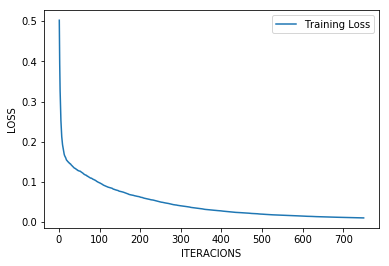

In [219]:
import numpy as np
import matplotlib.pyplot as plt

model = XGBClassifier(n_estimators=750, objective='binary:logistic')

train_losses = []
eval_set = [(X_train, y_train)]
model.fit(X_train, y_train, eval_metric='logloss', eval_set=eval_set, verbose=False)

train_losses = model.evals_result()['validation_0']['logloss']
iterations = np.arange(1, len(train_losses) + 1)

plt.plot(iterations, train_losses, label='Training Loss')
plt.xlabel("ITERACIONS")
plt.ylabel("LOSS")
plt.legend()
plt.show()

GridSearch

In [220]:
# xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',)

# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

In [221]:
# folds = 3
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [222]:
# grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3)
# grid.fit(X, y)

In [223]:
# print('\n Best parameters:')
# print(grid.best_params_)

Fit the model with the best parameters of the GS

In [224]:
y_pred = model.predict_proba(X_test)

Evaluation metrics

In [225]:
from utils import get_yhat_in_prob_array, build_clf_report, plot_confusion_matrix, plot_roc_auc
%run utils.py

In [226]:
y_hat = get_yhat_in_prob_array(y_pred)
#y_true = get_yhat_in_prob_array(y_test)

In [236]:
build_clf_report(y_test,y_hat, 0.03)

              precision    recall  f1-score   support

    Not Goal       0.98      0.87      0.92      7238
        Goal       0.44      0.86      0.58       853

    accuracy                           0.87      8091
   macro avg       0.71      0.86      0.75      8091
weighted avg       0.92      0.87      0.89      8091



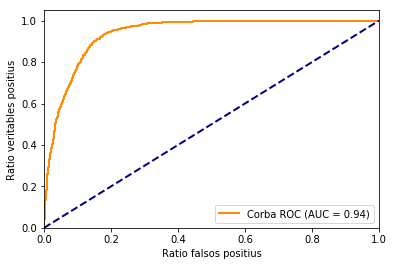

In [228]:
plot_roc_curve1(y_test,y_hat)

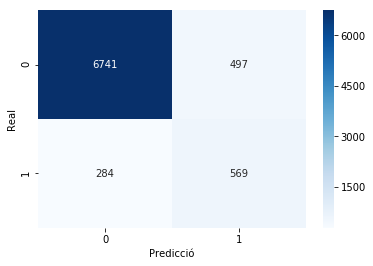

In [247]:
plot_confusion_matrix(y_test,y_hat, 0.2)

(array([6786.,  239.,  155.,  109.,  124.,   81.,   87.,   90.,  122.,
         298.]),
 array([5.0876836e-09, 9.9997677e-02, 1.9999535e-01, 2.9999304e-01,
        3.9999071e-01, 4.9998838e-01, 5.9998608e-01, 6.9998372e-01,
        7.9998142e-01, 8.9997905e-01, 9.9997675e-01], dtype=float32),
 <a list of 10 Patch objects>)

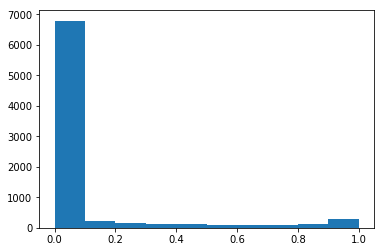

In [230]:
plt.hist(y_hat)

Fit model without GridSearch. Worse results

In [208]:
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')
model.fit(X_train, y_train)

C:\Users\guill\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Predict the test dataset which will return a probability from 0 to 1

In [74]:
y_pred = model.predict_proba(X_test)

In [75]:
y_test.value_counts()

0    7238
1     853
Name: Goal, dtype: int64

Load and run utils to show the evalaution metrics of the model

In [76]:
from utils import get_yhat_in_prob_array, build_clf_report, plot_confusion_matrix, plot_roc_auc
%run utils.py

In [77]:
y_hat = get_yhat_in_prob_array(y_pred)

In [99]:
build_clf_report(y_test,y_hat, 0.5)

              precision    recall  f1-score   support

    Not Goal       0.91      0.99      0.95      7238
        Goal       0.76      0.22      0.34       853

    accuracy                           0.91      8091
   macro avg       0.84      0.60      0.64      8091
weighted avg       0.90      0.91      0.89      8091



(array([6964.,  167.,  105.,   87.,   76.,   57.,   51.,   76.,  115.,
         393.]),
 array([3.7357296e-12, 9.9999979e-02, 1.9999996e-01, 2.9999992e-01,
        3.9999992e-01, 4.9999988e-01, 5.9999985e-01, 6.9999981e-01,
        7.9999983e-01, 8.9999980e-01, 9.9999976e-01], dtype=float32),
 <a list of 10 Patch objects>)

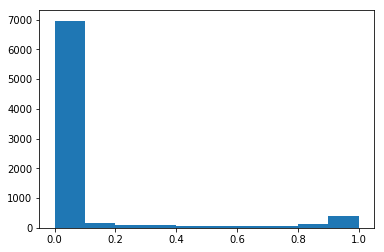

In [214]:
plt.hist(y_hat)

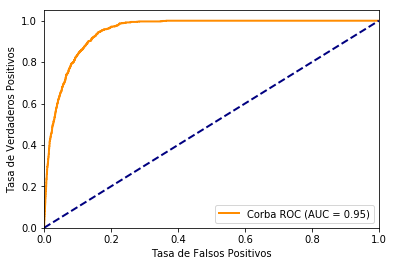

In [81]:
plot_roc_curve1(y_test,y_hat)

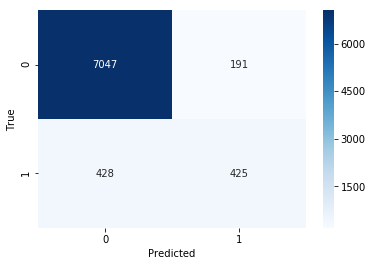

In [80]:
plot_confusion_matrix(y_test,y_hat, 0.5)

# BALANCE DATASET

In [100]:
from balance_techniques import undersample_condensed_nn, undersample_nearmiss
from balance_techniques import undersample_edited_nn, undersample_tomek_links, oversample_smote

In [101]:
%run balance_techniques.py

In [102]:
y_train.value_counts()

0    28948
1     3416
Name: Goal, dtype: int64

LETS TRY DIFFERENT COMBINATIONS WITH UNDERSMAPLING AND OVERSMAPLING

In [195]:
#15
X_train_us, y_train_us = oversample_smote(X_train, y_train, sampling_strategy=1)
#X_train_us, y_train_us = undersample_nearmiss(X_train_us, y_train_us)

C:\Users\guill\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [196]:
y_train_us.value_counts()

1    28948
0    28948
Name: Goal, dtype: int64

C:\Users\guill\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:29:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


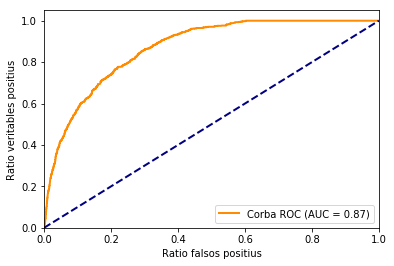

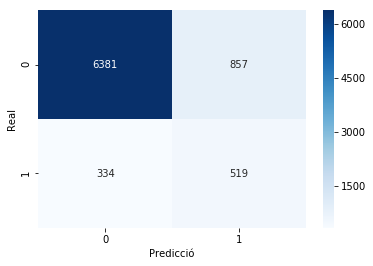

              precision    recall  f1-score   support

    Not Goal       0.95      0.88      0.91      7238
        Goal       0.38      0.61      0.47       853

    accuracy                           0.85      8091
   macro avg       0.66      0.75      0.69      8091
weighted avg       0.89      0.85      0.87      8091



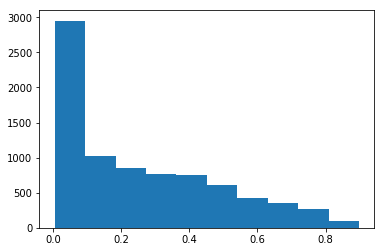

In [197]:
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                   colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight= 10, subsample= 1.0)

model.fit(X_train_us,y_train_us)


y_pred = model.predict_proba(X_test)
y_hat = get_yhat_in_prob_array(y_pred)

plot_roc_curve1(y_test, y_hat)
plot_confusion_matrix(y_test,y_hat, 0.5)
plt.hist(y_hat)
build_clf_report(y_test,y_hat, 0.5)

In [158]:
#25
# X_train_us, y_train_us = undersample_condensed_nn(X_train, y_train)
# X_train_us, y_train_us = oversample_smote(X_train_us, y_train_us, sampling_strategy=1)

In [159]:
# y_train_us.value_counts()

In [160]:
# model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                    colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight= 10, subsample= 1.0)

# model.fit(X_train_us,y_train_us)


# y_pred = model.predict_proba(X_test)
# y_hat = get_yhat_in_prob_array(y_pred)

# plot_roc_curve1(y_test, y_hat)
# plot_confusion_matrix(y_test,y_hat, 0.5)
# plt.hist(y_hat)

In [176]:
#35
X_train_us, y_train_us = undersample_tomek_links(X_train, y_train)
X_train_us, y_train_us = oversample_smote(X_train_us, y_train_us, sampling_strategy=0.8)

C:\Users\guill\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [177]:
y_train_us.value_counts()

0    27576
1    22060
Name: Goal, dtype: int64

C:\Users\guill\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


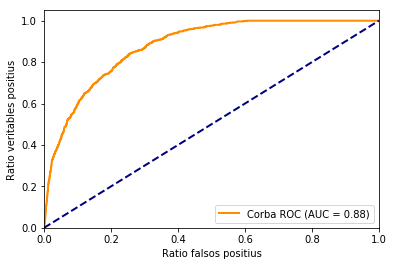

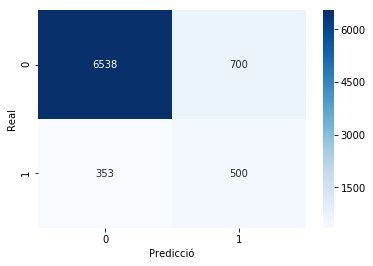

              precision    recall  f1-score   support

    Not Goal       0.95      0.90      0.93      7238
        Goal       0.42      0.59      0.49       853

    accuracy                           0.87      8091
   macro avg       0.68      0.74      0.71      8091
weighted avg       0.89      0.87      0.88      8091



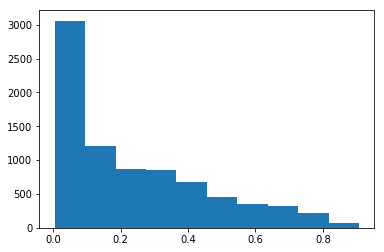

In [178]:
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                   colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight= 10, subsample= 1.0)

model.fit(X_train_us,y_train_us)


y_pred = model.predict_proba(X_test)
y_hat = get_yhat_in_prob_array(y_pred)

plot_roc_curve1(y_test, y_hat)
plot_confusion_matrix(y_test,y_hat, 0.5)
plt.hist(y_hat)
build_clf_report(y_test,y_hat, 0.5)

In [180]:
#45
X_train_us, y_train_us = undersample_edited_nn(X_train, y_train)
X_train_us, y_train_us = oversample_smote(X_train_us, y_train_us, sampling_strategy=0.8)

C:\Users\guill\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [181]:
y_train_us.value_counts()

0    22369
1    17895
Name: Goal, dtype: int64

C:\Users\guill\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


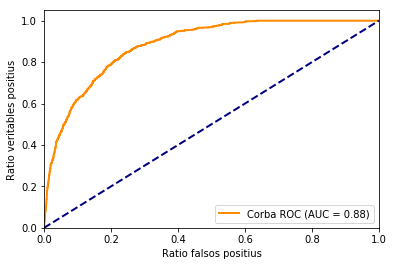

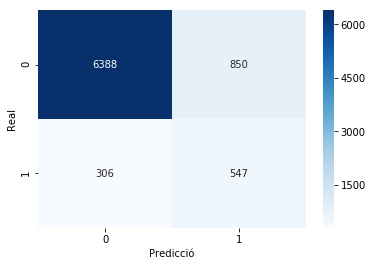

              precision    recall  f1-score   support

    Not Goal       0.95      0.88      0.92      7238
        Goal       0.39      0.64      0.49       853

    accuracy                           0.86      8091
   macro avg       0.67      0.76      0.70      8091
weighted avg       0.89      0.86      0.87      8091



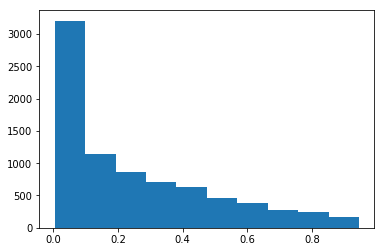

In [182]:
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                   colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight= 10, subsample= 1.0)

model.fit(X_train_us,y_train_us)


y_pred = model.predict_proba(X_test)
y_hat = get_yhat_in_prob_array(y_pred)

plot_roc_curve1(y_test, y_hat)
plot_confusion_matrix(y_test,y_hat, 0.5)
plt.hist(y_hat)
build_clf_report(y_test,y_hat, 0.5)

In [198]:
#235
X_train_us, y_train_us = undersample_condensed_nn(X_train, y_train)
X_train_us, y_train_us = undersample_tomek_links(X_train_us, y_train_us)
X_train_us, y_train_us = oversample_smote(X_train_us, y_train_us, sampling_strategy=0.9)

C:\Users\guill\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [199]:
y_train_us.value_counts()

0    5326
1    4793
Name: Goal, dtype: int64

C:\Users\guill\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


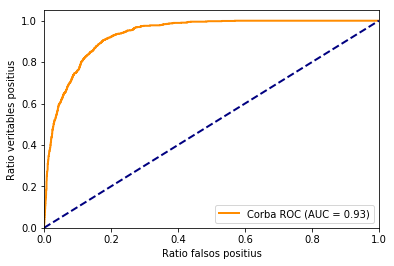

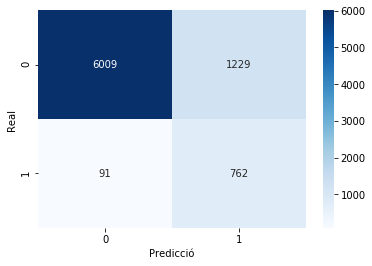

              precision    recall  f1-score   support

    Not Goal       0.99      0.83      0.90      7238
        Goal       0.38      0.89      0.54       853

    accuracy                           0.84      8091
   macro avg       0.68      0.86      0.72      8091
weighted avg       0.92      0.84      0.86      8091



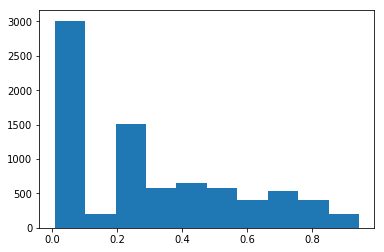

In [200]:
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                   colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight= 10, subsample= 1.0)

model.fit(X_train_us,y_train_us)


y_pred = model.predict_proba(X_test)
y_hat = get_yhat_in_prob_array(y_pred)

plot_roc_curve1(y_test, y_hat)
plot_confusion_matrix(y_test,y_hat, 0.5)
plt.hist(y_hat)
build_clf_report(y_test,y_hat, 0.5)

In [186]:
#245
# X_train_us, y_train_us = undersample_condensed_nn(X_train, y_train)
# X_train_us, y_train_us = undersample_edited_nn(X_train_us, y_train_us)
# X_train_us, y_train_us = oversample_smote(X_train_us, y_train_us, sampling_strategy=1)

In [187]:
# y_train_us.value_counts()

In [188]:
# model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                    colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight= 10, subsample= 1.0)

# model.fit(X_train_us,y_train_us)


# y_pred = model.predict_proba(X_test)
# y_hat = get_yhat_in_prob_array(y_pred)

# plot_roc_curve1(y_test, y_hat)
# plot_confusion_matrix(y_test,y_hat, 0.5)
# plt.hist(y_hat)

In [189]:
#345
X_train_us, y_train_us = undersample_tomek_links(X_train, y_train)
X_train_us, y_train_us = undersample_edited_nn(X_train_us, y_train_us)
X_train_us, y_train_us = oversample_smote(X_train_us, y_train_us, sampling_strategy=0.8)

C:\Users\guill\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [190]:
y_train_us.value_counts()

0    21991
1    17592
Name: Goal, dtype: int64

C:\Users\guill\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:27:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


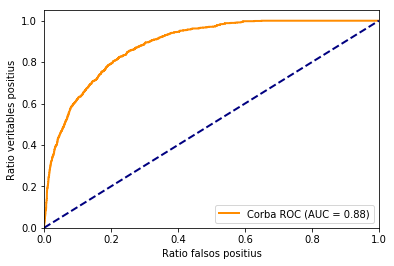

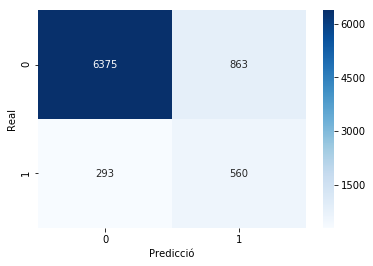

              precision    recall  f1-score   support

    Not Goal       0.96      0.88      0.92      7238
        Goal       0.39      0.66      0.49       853

    accuracy                           0.86      8091
   macro avg       0.67      0.77      0.70      8091
weighted avg       0.90      0.86      0.87      8091



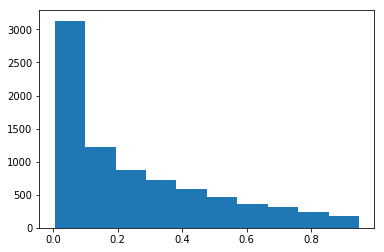

In [191]:
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                   colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight= 10, subsample= 1.0)

model.fit(X_train_us,y_train_us)


y_pred = model.predict_proba(X_test)
y_hat = get_yhat_in_prob_array(y_pred)

plot_roc_curve1(y_test, y_hat)
plot_confusion_matrix(y_test,y_hat, 0.5)
plt.hist(y_hat)
build_clf_report(y_test,y_hat, 0.5)

# ---------------------------------------------------------------------------------------------------------------

ANALISI RSULTATS

Model amb desbalancejament

In [244]:
from utils_feature_engineering import get_all_events_of_a_match, percent_coord_to_points, get_shot_distance, get_shot_angle, plot_in_pitch
%run utils_feature_engineering

In [294]:
import pandas as pd
import numpy as np

# Definir el umbral personalizado
threshold = 0.1

# Convertir las probabilidades en etiquetas binarias usando el umbral
y_pred = np.where(y_hat >= threshold, 1, 0)

# Crear un DataFrame con las predicciones y las etiquetas reales
df = pd.DataFrame({'y_pred': y_pred, 'y_true': y_test})

# Calcular TP, FP, FN, TN para cada fila
df['TP'] = np.where((df['y_pred'] == 1) & (df['y_true'] == 1), 1, 0)
df['FP'] = np.where((df['y_pred'] == 1) & (df['y_true'] == 0), 1, 0)
df['FN'] = np.where((df['y_pred'] == 0) & (df['y_true'] == 1), 1, 0)
df['TN'] = np.where((df['y_pred'] == 0) & (df['y_true'] == 0), 1, 0)

# Imprimir el DataFrame con los resultados


In [293]:
fp = df[df['FP']==1]
fp =X_test[X_test.index.isin(fp.index)]

In [284]:
len(fp)

247

In [295]:
fn = df[df['FN']==1]
fn =X_test[X_test.index.isin(fn.index)]

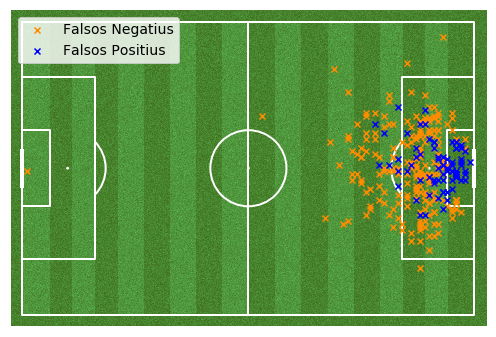

In [305]:
pitch = Pitch(pitch_type='wyscout',pitch_color='grass', line_color='white', stripe=True, linewidth=2)
fig, ax = pitch.draw(figsize=(7,7))
pitch.scatter(fn['x_position'],fn['y_position'],color='darkorange',ax=ax, marker='x', label='Falsos Negatius')
pitch.scatter(fp['x_position'],fp['y_position'],color='blue',ax=ax, marker='x', label='Falsos Positius')


plt.legend(prop={'size': 14})
plt.show()

In [302]:
np.save('falsos negatius',np.array(fn.index))

In [301]:
np.array(fn.index)

array([19485,  6802,  4070, 37663, 27713, 11884, 32100, 33151, 37370,
       20312,  5885, 37527, 28341, 32309, 34234, 22677, 25669, 31790,
        6784, 37066,  1544,  4349, 23989, 36187, 39671, 32292, 30295,
       17655, 33768, 25257,  2874,  4574,  4043, 15315, 21133, 28308,
       34810, 39330, 25885, 40387,  5965, 21629,  1210,  8744,  7515,
       35197, 38356, 22989,  4985, 21580, 15034,  4416, 13534, 21070,
       30944, 35655, 37481, 10481,  3231, 16912,  3893, 27669, 27529,
       18088, 31635, 28859,  6641, 31324,   878, 14252, 38008,    30,
       21413, 13660, 16797, 20923,  7728, 10911, 15820,  8827, 26148,
       19657,  9826, 20276, 22753, 34493, 30348, 23356,  1771, 12973,
       23423,  4301, 13814,  8732, 35869, 31332, 39097,   770,  2420,
        5051, 17512, 35801, 22751, 24436, 32794,  4787,   717, 36047,
       17235, 40380,  7465, 31644, 39567, 14379,  4079, 13323, 40167,
       19451, 13135,  2926, 17723, 21894, 14821, 24937, 38412, 25471,
        2271, 22414,

In [303]:
hh = pd.read_csv('df_xuts_clf.csv')

In [304]:
hh

,Unnamed: 0,index,minut,x_position,y_position,Counter attack,Goal,Head/body,distance,angle,x_coordinate_recovery,y_coordinate_recovery,possesion_time,recovery_way,with_natural_foot,Right foot,Left foot
0,0,0,0.962853,93,34,1,0,0,12.735089,54.75,12,73,0.004634,Ground defending duel,0,0,1
1,1,1,1.012121,80,59,0,0,0,21.799599,15.57,100,100,0.030301,Reflexes,1,1,0
2,2,2,7.449769,88,57,0,0,0,13.396361,19.86,91,61,0.556306,Air duel,1,1,0
3,3,3,8.148819,87,66,0,0,0,17.160492,37.30,11,35,0.662127,Touch,1,1,0
4,4,4,15.814535,75,40,0,0,0,27.042790,13.91,10,42,0.039305,Clearance,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,7971,7972,70.030220,88,29,0,1,1,18.576396,47.29,11,72,0.016831,Ground defending duel,0,0,0
7972,7972,7973,73.867965,88,70,0,0,0,18.104143,45.90,12,32,0.037414,Ground defending duel,1,1,0
7973,7973,7974,74.600457,93,66,1,0,0,12.735089,54.75,84,100,0.268853,Throw in,1,1,0
7974,7974,7975,77.403135,90,32,0,0,0,15.720687,48.09,13,73,0.020453,Ground defending duel,1,1,0


In [ ]:
player_shots = pd.re